# **COMPI Project**

Team: Mohammed Dahbani & Mahmoud Mokrane

In [1]:
!pip install diffusers

# **Image for inference phase**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
from PIL import Image

def add_awgn(image_path, noise_std=25):
    # Open the image and convert it to a NumPy array
    img = Image.open(image_path).convert("RGB")
    img_array = np.array(img).astype(np.float32)

    # Generate Gaussian noise
    noise = np.random.normal(0, noise_std, img_array.shape)

    # Add noise to the image
    noisy_img_array = img_array + noise

    # Clip values to stay within the valid range [0, 255]
    noisy_img_array = np.clip(noisy_img_array, 0, 255).astype(np.uint8)

    # Convert back to an image
    return Image.fromarray(noisy_img_array)

# Folder containing images
image_folder = r"C:\Users\dahba\Downloads\COMPI\clean_image_test"
output_folder = r"C:\Users\dahba\Downloads\COMPI\noisy_image_test"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(image_folder, filename)
        noisy_image = add_awgn(image_path, noise_std=3)  # Adjust noise_std for different noise levels

        # Save the noisy image
        noisy_image.save(os.path.join(output_folder, f"noisy_{filename}"))


In [ ]:
import cv2
import os

# Path to the folder containing noisy images
input_folder = r'C:\Users\dahba\Downloads\COMPI\noisy_image_test'
output_folder = r'C:\Users\dahba\Downloads\COMPI\restored_image_test'
# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate over each image in the folder
for filename in os.listdir(input_folder):
    input_image_path = os.path.join(input_folder, filename)

    # Check if the file is an image
    if filename.endswith(('.jpg')):
        # Read the noisy image
        image = cv2.imread(input_image_path)

        # Denoise using GaussianBlur (or other denoising methods like Non-Local Means Denoising)
        denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

        # Save the denoised image to the output folder
        output_image_path = os.path.join(output_folder, f"restored_{filename}")
        cv2.imwrite(output_image_path, denoised_image)

        print(f'Denoised {filename} and saved to {output_folder}')


Denoised noisy_1110822219_a079aeff30_c.jpg and saved to /content/drive/MyDrive/COMPI/restored_image_test


In [ ]:
!pip install lpips

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import torch
import lpips
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim

clean_folder = r'C:\Users\dahba\Downloads\COMPI\clean_image_test'
noisy_folder = r'C:\Users\dahba\Downloads\COMPI\noisy_image_test'
restored_folder = r'C:\Users\dahba\Downloads\COMPI\restored_image_test'

lpips_model = lpips.LPIPS(net='alex')

def load_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    return img

def compute_metrics(clean_img, test_img):
    clean_img = clean_img.astype(np.float32) / 255.0
    test_img = test_img.astype(np.float32) / 255.0

    psnr_value = psnr(clean_img, test_img, data_range=1.0)

    ssim_value = ssim(clean_img, test_img, data_range=1.0, channel_axis=2, win_size=3)

    lpips_value = lpips_model(torch.tensor(clean_img).permute(2, 0, 1).unsqueeze(0),
                              torch.tensor(test_img).permute(2, 0, 1).unsqueeze(0)).item()
    return psnr_value, ssim_value, lpips_value

rows = []

for filename in os.listdir(clean_folder):

    clean_path = os.path.join(clean_folder, filename)
    noisy_path = os.path.join(noisy_folder, f'noisy_{filename}')
    restored_path = os.path.join(restored_folder, f'restored_noisy_{filename}')

    clean_img = load_image(clean_path)
    noisy_img = load_image(noisy_path)
    restored_img = load_image(restored_path)

    if clean_img is None or noisy_img is None or restored_img is None:
        continue

    psnr_noisy, ssim_noisy, lpips_noisy = compute_metrics(clean_img, noisy_img)
    psnr_restored, ssim_restored, lpips_restored = compute_metrics(clean_img, restored_img)

    rows.append([filename, psnr_noisy, psnr_restored, ssim_noisy, ssim_restored, lpips_noisy, lpips_restored])

df = pd.DataFrame(rows, columns=['Filename', 'PSNR_Noisy', 'PSNR_Restored', 'SSIM_Noisy', 'SSIM_Restored', 'LPIPS_Noisy', 'LPIPS_Restored'])

print(df)


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
                      Filename  PSNR_Noisy  PSNR_Restored  SSIM_Noisy  \
0  1110822219_a079aeff30_c.jpg   32.157555      32.828584    0.744783   

   SSIM_Restored  LPIPS_Noisy  LPIPS_Restored  
0       0.913136      0.21667        0.106944  


In [ ]:
df

,Filename,PSNR_Noisy,PSNR_Restored,SSIM_Noisy,SSIM_Restored,LPIPS_Noisy,LPIPS_Restored
0,1110822219_a079aeff30_c.jpg,32.157555,32.828584,0.744783,0.913136,0.21667,0.106944


# **DOT pipeline**

## **1- Training phase (Offline phase)**

### 1.1- Encode images

In [ ]:
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from diffusers import AutoencoderKL
import torch



def encode_images(model, dataloader, num_images=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model.eval()

    latent_codes = []

    with torch.no_grad():
        for batch_idx, (data, _) in enumerate(dataloader):
            if batch_idx * dataloader.batch_size >= num_images:
                break

            data = data.to(device)
            latent_rep = model.encode(data).latent_dist.sample()

            # Redimensionnement correct (batch_size, C*H*W) --> (batch_size, 256)
            latent_rep = latent_rep.reshape(latent_rep.shape[0], -1)[:, :256]

            latent_codes.append(latent_rep.cpu().numpy())

    latent_codes = np.concatenate(latent_codes, axis=0)

    return latent_codes[:num_images]


### 1.2- Compute the OT operator

In [ ]:
import numpy as np
from scipy.linalg import sqrtm

def compute_ot_operator(source_latents, target_latents):
    # Calcul des moyennes
    mu_source = np.mean(source_latents, axis=0)
    mu_target = np.mean(target_latents, axis=0)

    # Calcul des matrices de covariance
    cov_source = np.cov(source_latents, rowvar=False)
    cov_target = np.cov(target_latents, rowvar=False)

    # Stabilité numérique avec une régularisation plus forte
    eps = 1e-3  # Augmenté pour éviter les valeurs complexes
    cov_source += np.eye(cov_source.shape[0]) * eps
    cov_target += np.eye(cov_target.shape[0]) * eps

    # Vérification avant sqrtm()
    print("Cov source min:", np.min(cov_source), "max:", np.max(cov_source))
    print("Cov target min:", np.min(cov_target), "max:", np.max(cov_target))

    # Calcul des racines et inverses avec forçage en réel
    cov_source_sqrt = np.real(sqrtm(cov_source))
    cov_source_sqrt_inv = np.linalg.inv(cov_source_sqrt)

    # Calcul de la transformation avec forçage en réel
    middle_term = np.real(sqrtm(cov_source_sqrt @ cov_target @ cov_source_sqrt))
    transform_matrix = np.real(cov_source_sqrt_inv @ middle_term @ cov_source_sqrt_inv)

    # Vérification finale
    print("Transform matrix min:", np.min(transform_matrix), "max:", np.max(transform_matrix), "mean:", np.mean(transform_matrix))

    return {
        'mu_source': mu_source,
        'mu_target': mu_target,
        'transform_matrix': transform_matrix
    }


###  1.3- Apply OT transformer

In [ ]:
import numpy as np
from scipy.linalg import sqrtm

def apply_ot_transform(latent_code, ot_operator):
    """Applies the Optimal Transport transform to a latent code.

    Args:
        latent_code: The latent code to transform.
        ot_operator: The OT operator containing the transform parameters.

    Returns:
        The transformed latent code.
    """
    mu_source = ot_operator['mu_source']
    mu_target = ot_operator['mu_target']
    transform_matrix = ot_operator['transform_matrix']

    # Reshape latent_code and mu_source to 2D for compatibility with transform_matrix
    original_shape = latent_code.shape
    latent_code = latent_code.reshape(latent_code.shape[0], -1)
    mu_source = mu_source.reshape(mu_source.shape[0], -1)

    # Apply the transformation
    print("latent_code shape:", latent_code.shape)
    print("mu_source shape before correction:", mu_source.shape)

    mu_source = mu_source.mean(axis=0, keepdims=True)

    print("mu_source shape after correction:", mu_source.shape)

    centered = latent_code - mu_source

    transformed = np.dot(transform_matrix, centered.T).T + mu_target
    # Apply to transposed data, then transpose back

    transformed = np.real(transformed).astype(np.float32)

    print("Latent min:", np.min(transformed))
    print("Latent max:", np.max(transformed))
    print("Latent mean:", np.mean(transformed))

    return transformed.reshape(original_shape)

## **2-Inference phase**

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

# Fonction pour calculer le PSNR
def calculate_psnr(mse, max_value=255.0):
    if mse == 0:
        return 100
    return 10 * np.log10(max_value**2 / mse)

# Fonction pour la phase d'inférence avec le paramètre alpha
def test_image_restoration_with_alpha(vae_model, ot_operator, test_image_path, clean_image_path, alpha=0.5):
    """
    Applique la restauration d'image en utilisant le transport optimal
    avec un paramètre d'interpolation alpha pour contrôler l'équilibre entre
    perception et distorsion.

    alpha = 0 : Prioritise la perception (image originale restaurée)
    alpha = 1 : Prioritise la précision (image transformée par OT)
    0 < alpha < 1 : Compromis entre les deux
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    vae_model = vae_model.to(device)
    vae_model.eval()

    # Charger et prétraiter l'image de test
    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor()
    ])

    clean_image = Image.open(clean_image_path).convert('RGB')
    clean_tensor = transform(clean_image).unsqueeze(0).to(device)

    test_image = Image.open(test_image_path).convert('RGB')
    test_tensor = transform(test_image).unsqueeze(0).to(device)

    # Encoder l'image dans l'espace latent
    with torch.no_grad():
        latent_rep = vae_model.encode(test_tensor).latent_dist.sample()
        latent_code = latent_rep.cpu().numpy()[0]

    # Appliquer la transformation OT
    transformed_latent = apply_ot_transform(latent_code, ot_operator)

    # Appliquer l'interpolation alpha dans l'espace latent
    interpolated_latent = (1 - alpha) * transformed_latent + alpha * latent_code

    interpolated_latent = interpolated_latent.astype(np.float32)
    # Convertir en tensor
    interpolated_latent_tensor = torch.tensor(interpolated_latent, dtype=torch.float32).unsqueeze(0).to(device)

    # Décoder pour obtenir l'image restaurée
    with torch.no_grad():
        restored_image = vae_model.decode(interpolated_latent_tensor)

    # Convertir en numpy pour l'affichage
    clean_np = clean_tensor.cpu().squeeze(0).permute(1, 2, 0).numpy()
    original_np = test_tensor.cpu().squeeze(0).permute(1, 2, 0).numpy()
    restored_np = restored_image.sample.cpu().squeeze(0).permute(1, 2, 0).numpy()

    # Calculer les métriques
    mse_ot = np.mean((clean_np - restored_np) ** 2)
    mse_originale = np.mean((clean_np - original_np) ** 2)

    # Calcul du PSNR
    psnr_ot = calculate_psnr(mse_ot)
    psnr_originale = calculate_psnr(mse_originale)

    # Afficher les résultats
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(original_np)
    ax[0].set_title(f'Image originale restaurée (α = 1), MSE: {mse_originale:.4f}, PSNR: {psnr_originale:.2f} dB')
    ax[0].axis('off')

    ax[1].imshow(restored_np)
    ax[1].set_title(f'Image avec DOT (α = {alpha}), MSE: {mse_ot:.4f}, PSNR: {psnr_ot:.2f} dB')
    ax[1].axis('off')

    plt.suptitle(f'(α = {alpha})')
    plt.tight_layout()
    plt.savefig(f"ot_restoration_alpha_{alpha}.png")
    plt.show()

    return restored_np


In [ ]:
# Fonction pour générer la courbe perception-distortion avec coloration conditionnelle
def generate_perception_distortion_curve(vae_model, ot_operator, test_image_path, clean_image_path, alphas=None):
    """
    Génère la courbe perception-distortion en faisant varier alpha
    et en colorant les zones où alpha est hors des limites [0,1].
    """
    if alphas is None:
        alphas = np.linspace(-0.5, 1.5, 16)  # Étend la plage pour voir les zones interdites

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    vae_model = vae_model.to(device)
    vae_model.eval()

    # Charger l'image de test
    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor()
    ])

    clean_image = Image.open(clean_image_path).convert('RGB')
    clean_tensor = transform(clean_image).unsqueeze(0).to(device)

    test_image = Image.open(test_image_path).convert('RGB')
    test_tensor = transform(test_image).unsqueeze(0).to(device)

    # Encoder l'image
    with torch.no_grad():
        latent_rep = vae_model.encode(test_tensor).latent_dist.sample()
        latent_code = latent_rep.cpu().numpy()[0]

    # Appliquer la transformation OT
    transformed_latent = apply_ot_transform(latent_code, ot_operator)

    # Calculer la distortion et perception pour différents alphas
    mse_values = []
    w2_proxies = []

    reference_np = clean_tensor.cpu().squeeze(0).permute(1, 2, 0).numpy()
    result_images = []

    for alpha in alphas:
        interpolated_latent = (1 - alpha) * latent_code + alpha * transformed_latent
        interpolated_latent = interpolated_latent.astype(np.float32)
        interpolated_latent_tensor = torch.tensor(interpolated_latent, dtype=torch.float32).unsqueeze(0).to(device)

        # Décoder
        with torch.no_grad():
            restored_image = vae_model.decode(interpolated_latent_tensor)

        restored_np = restored_image.sample.cpu().squeeze(0).permute(1, 2, 0).numpy()
        result_images.append(restored_np)

        # Calculer MSE (distortion)
        mse = np.mean((reference_np - restored_np) ** 2)
        mse_values.append(mse)

        # Proxy pour W2 (perception)
        w2_proxy = np.linalg.norm(interpolated_latent - transformed_latent)
        w2_proxies.append(w2_proxy)

    # Normaliser les valeurs
    mse_values = np.array(mse_values) / np.max(mse_values)
    w2_proxies = np.array(w2_proxies) / np.max(w2_proxies)


    # Convertir alphas en numpy array
    alphas = np.array(alphas)

    plt.figure(figsize=(10, 8))

    # Boucle pour tracer les segments avec la bonne couleur
    for i in range(len(alphas) - 1):
        alpha1, alpha2 = alphas[i], alphas[i+1]
        mse1, mse2 = mse_values[i], mse_values[i+1]
        w2_1, w2_2 = w2_proxies[i], w2_proxies[i+1]

        # Déterminer la couleur en fonction de alpha
        color = 'blue' if (0 <= alpha1 <= 1 and 0 <= alpha2 <= 1) else 'red'

        # Tracer un segment entre deux points successifs
        plt.plot([mse1, mse2], [w2_1, w2_2], '-', color=color, linewidth=2)

    plt.xlabel('Distortion (MSE, normalisé)')
    plt.ylabel('Perception (W2-proxy, normalisé)')
    plt.title('Courbe Perception-Distortion')
    plt.grid(True)
    plt.show()

    plot_smooth_perception_distortion_curve(mse_values, w2_proxies, alphas)

    return mse_values, w2_proxies, result_images


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def plot_smooth_perception_distortion_curve(mse_values, w2_proxies, alphas):
    alphas = np.array(alphas)  # Convertir en numpy array
    mse_values = np.array(mse_values)
    w2_proxies = np.array(w2_proxies)

    # Générer une interpolation spline pour lisser la courbe
    num_points = 300
    t = np.linspace(alphas.min(), alphas.max(), num_points)
    mse_smooth = make_interp_spline(alphas, mse_values)(t)
    w2_smooth = make_interp_spline(alphas, w2_proxies)(t)

    plt.figure(figsize=(10, 8))

    # Boucle pour tracer les segments avec la bonne couleur
    for i in range(len(t) - 1):
        alpha1, alpha2 = t[i], t[i+1]
        mse1, mse2 = mse_smooth[i], mse_smooth[i+1]
        w2_1, w2_2 = w2_smooth[i], w2_smooth[i+1]

        # Déterminer la couleur en fonction de alpha
        color = 'blue' if (0 <= alpha1 <= 1 and 0 <= alpha2 <= 1) else 'red'

        # Tracer un segment entre deux points successifs
        plt.plot([mse1, mse2], [w2_1, w2_2], '-', color=color, linewidth=2)

    plt.xlabel('Distortion (MSE, normalisé)')
    plt.ylabel('Perception (W2-proxy, normalisé)')
    plt.title('Courbe Perception-Distortion (Lissée)')
    plt.grid(True)
    plt.show()


# **Test**

## **1- Test with a pretrained VAE (Used in paper)**

### 2.1- Paired images


Calcul des codes latents pour les images restaurées...
Calcul des codes latents pour les images propres...
Calcul de l'opérateur de transport optimal...
Cov source min: -27.781870962068666 max: 71.64448073494411
Cov target min: -26.460351512798795 max: 101.8648808421187
Transform matrix min: -0.11256109359733206 max: 1.308857844796786 mean: 0.003103990382506649

Application de la transformation OT sur une image de test...
Test avec α = -0.7
latent_code shape: (4, 256)
mu_source shape before correction: (256, 1)
mu_source shape after correction: (1, 1)
Latent min: -15.280971265433202
Latent max: 19.824446840222333
Latent mean: 3.4341825130095542
Latent min: -15.280972
Latent max: 19.824448
Latent mean: 3.4341824


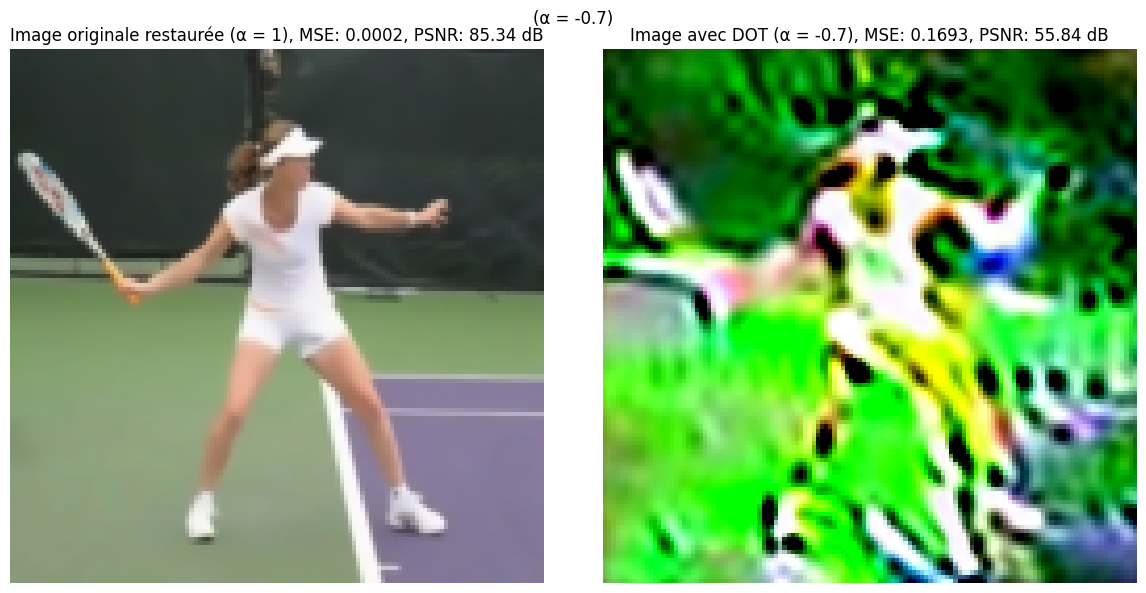

Test avec α = -0.5
latent_code shape: (4, 256)
mu_source shape before correction: (256, 1)
mu_source shape after correction: (1, 1)
Latent min: -15.281319243857432
Latent max: 19.8244947516962
Latent mean: 3.4341648899947037
Latent min: -15.28132
Latent max: 19.824495
Latent mean: 3.4341648


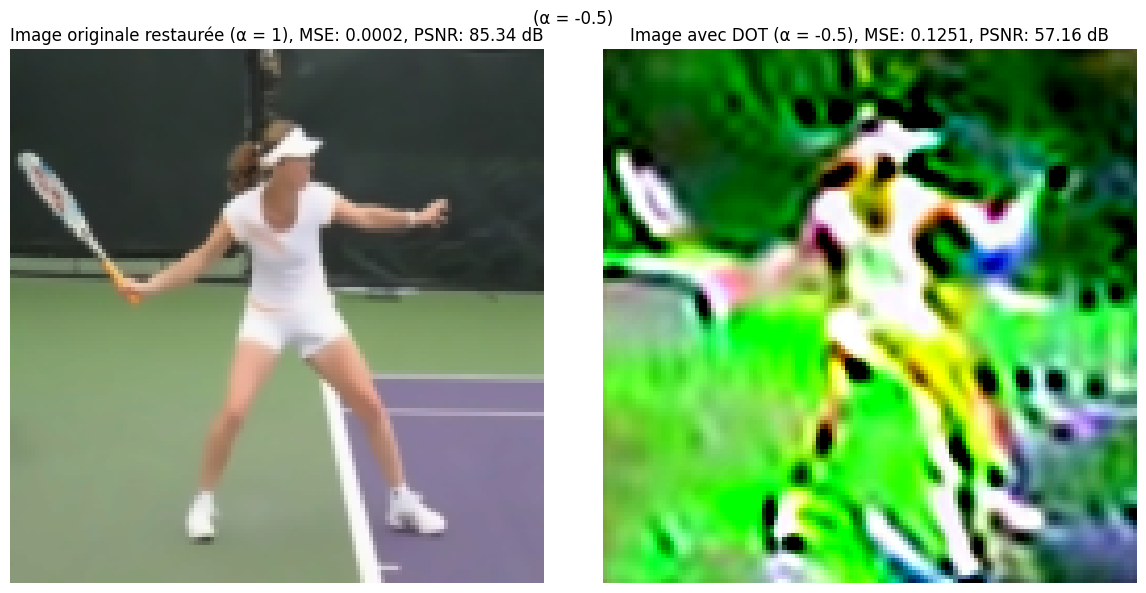

Test avec α = -0.3
latent_code shape: (4, 256)
mu_source shape before correction: (256, 1)
mu_source shape after correction: (1, 1)
Latent min: -15.281055636765188
Latent max: 19.82435916717875
Latent mean: 3.4341307745715426
Latent min: -15.281055
Latent max: 19.82436
Latent mean: 3.434131


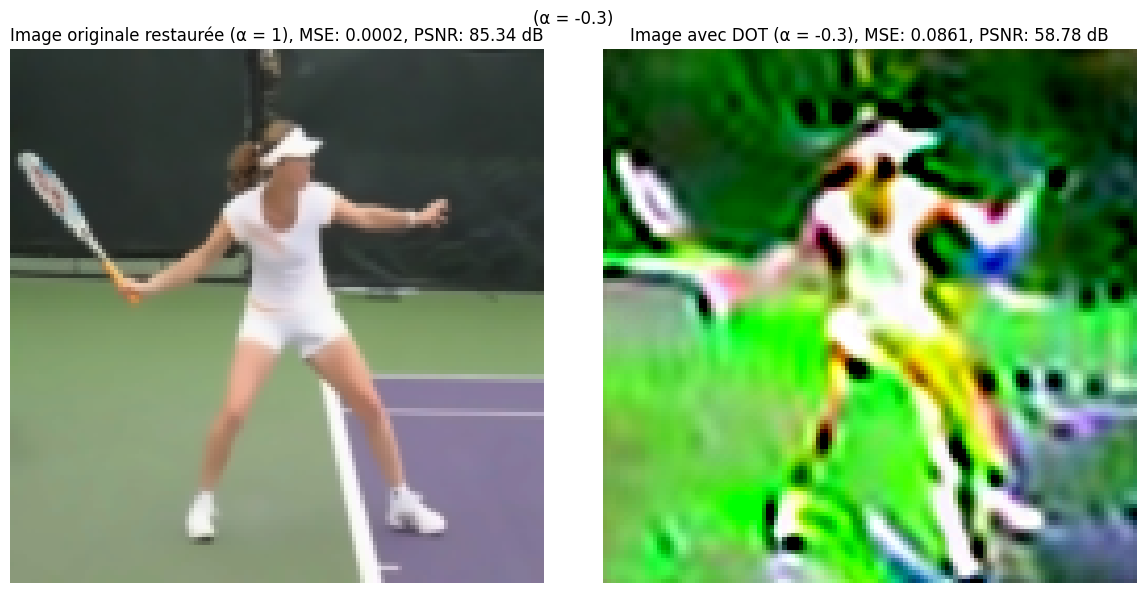

Test avec α = 0.0
latent_code shape: (4, 256)
mu_source shape before correction: (256, 1)
mu_source shape after correction: (1, 1)
Latent min: -15.281067620822704
Latent max: 19.82438243456966
Latent mean: 3.4341578738699488
Latent min: -15.281068
Latent max: 19.824383
Latent mean: 3.434158


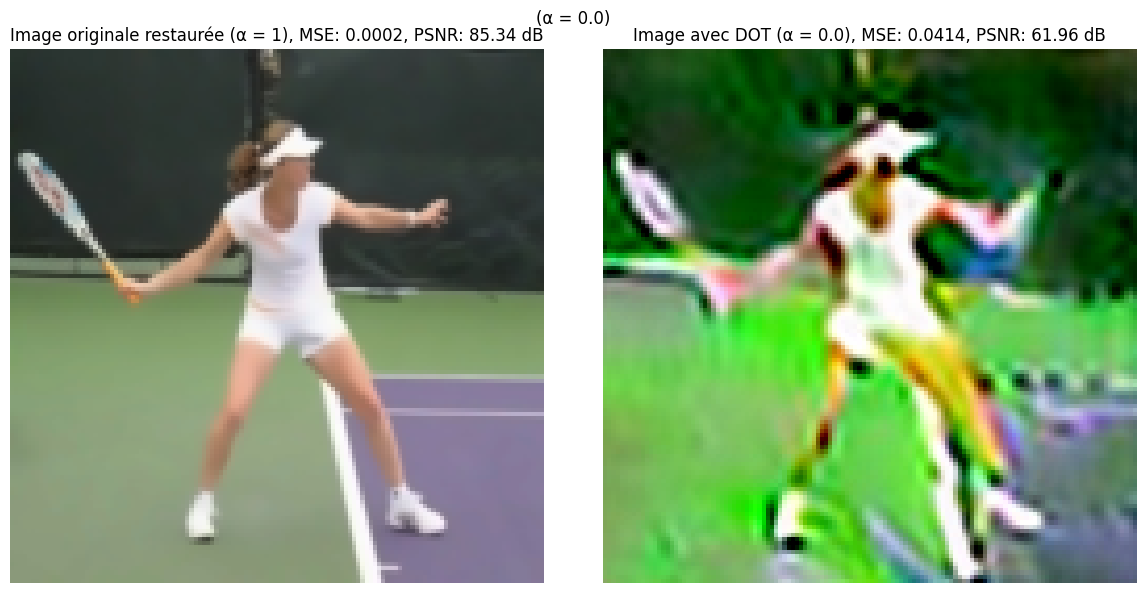

Test avec α = 0.3
latent_code shape: (4, 256)
mu_source shape before correction: (256, 1)
mu_source shape after correction: (1, 1)
Latent min: -15.281122584340572
Latent max: 19.824383834420523
Latent mean: 3.4341682323213143
Latent min: -15.281122
Latent max: 19.824385
Latent mean: 3.4341683


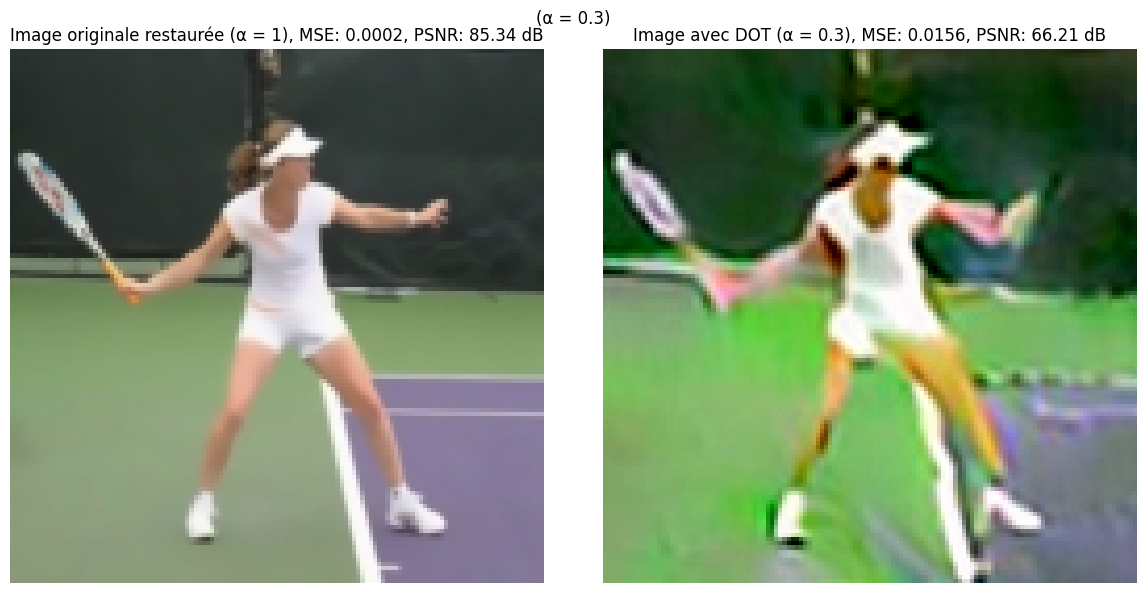

Test avec α = 0.5
latent_code shape: (4, 256)
mu_source shape before correction: (256, 1)
mu_source shape after correction: (1, 1)
Latent min: -15.281116965215169
Latent max: 19.824464223320565
Latent mean: 3.4341516861301593
Latent min: -15.281117
Latent max: 19.824465
Latent mean: 3.4341516


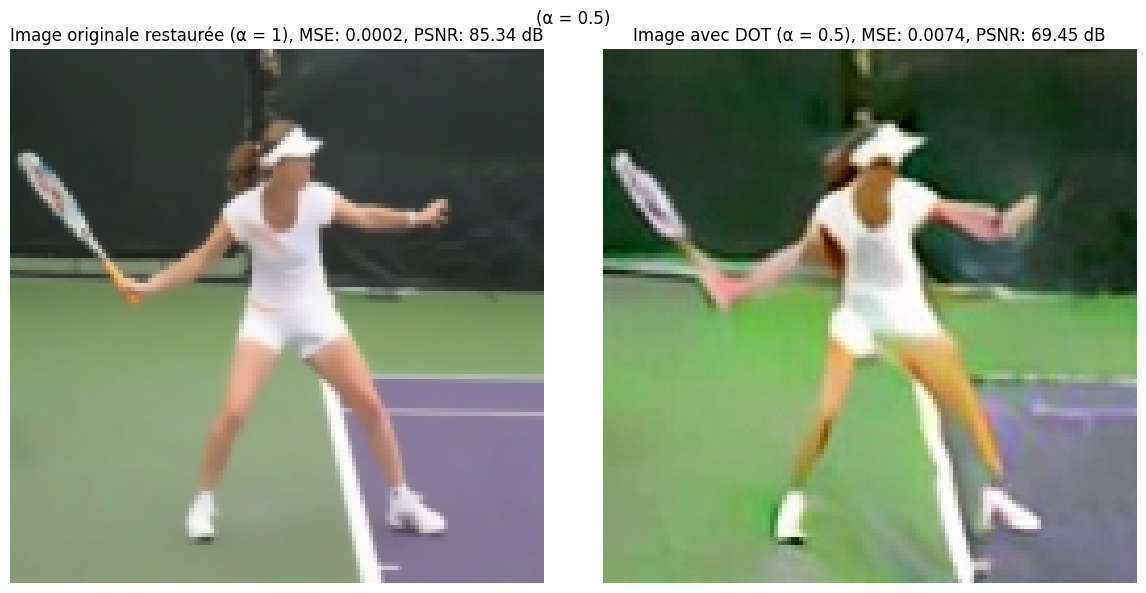

Test avec α = 0.7
latent_code shape: (4, 256)
mu_source shape before correction: (256, 1)
mu_source shape after correction: (1, 1)
Latent min: -15.281187679714225
Latent max: 19.824583626556326
Latent mean: 3.4341713722368477
Latent min: -15.281188
Latent max: 19.824583
Latent mean: 3.4341714


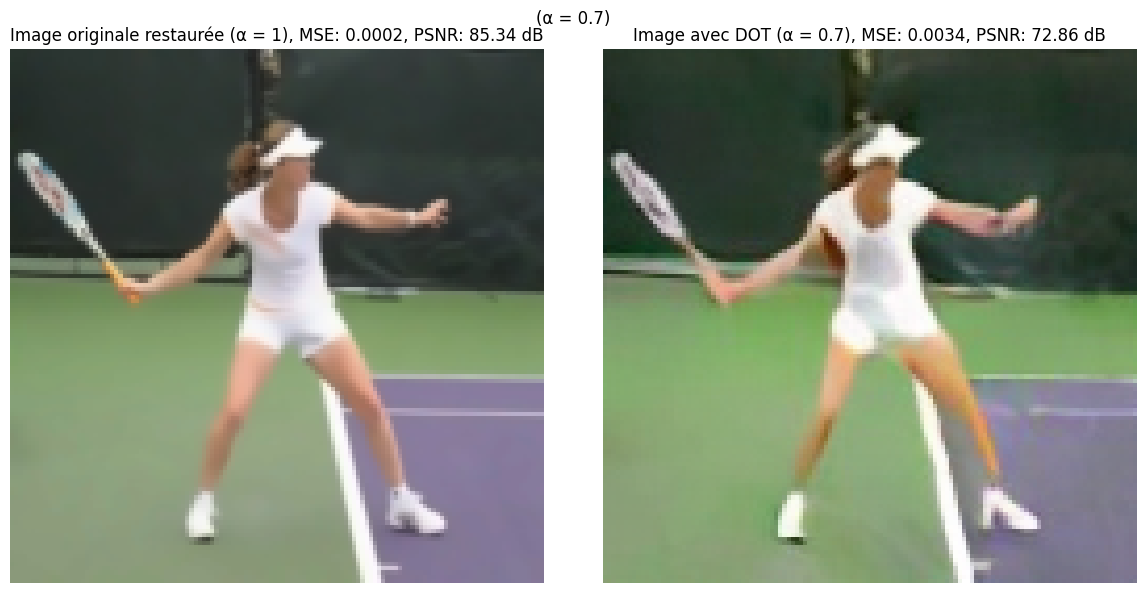

Test avec α = 1.0
latent_code shape: (4, 256)
mu_source shape before correction: (256, 1)
mu_source shape after correction: (1, 1)
Latent min: -15.280936651732425
Latent max: 19.824383573622846
Latent mean: 3.4341175098687025
Latent min: -15.280936
Latent max: 19.824383
Latent mean: 3.4341176


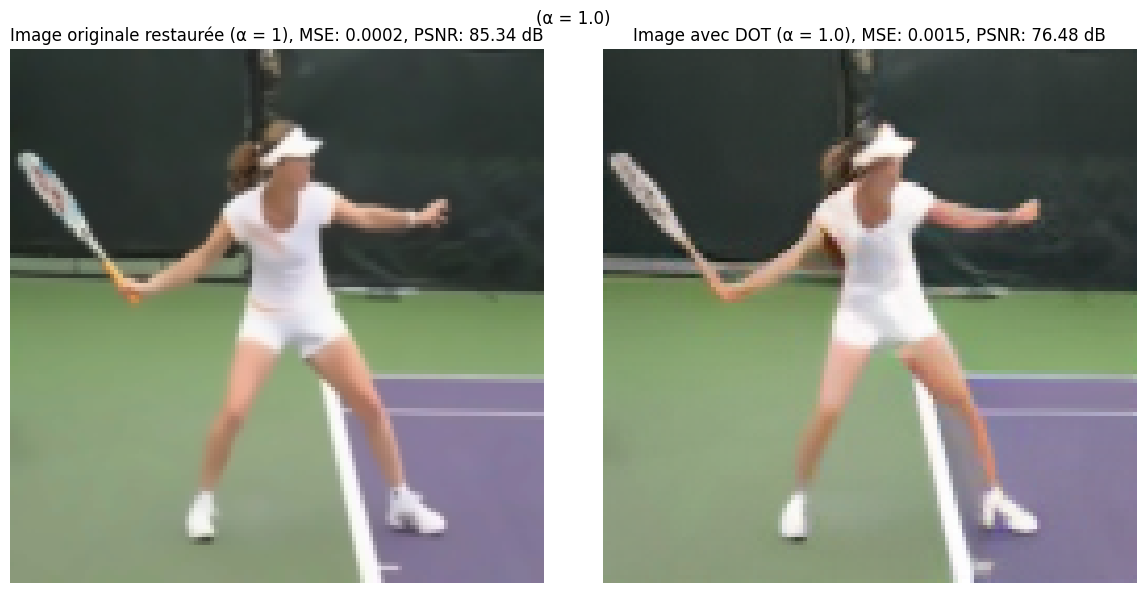

Test avec α = 1.3
latent_code shape: (4, 256)
mu_source shape before correction: (256, 1)
mu_source shape after correction: (1, 1)
Latent min: -15.28094742247892
Latent max: 19.82423579877689
Latent mean: 3.4341960541290417
Latent min: -15.280948
Latent max: 19.824236
Latent mean: 3.4341962


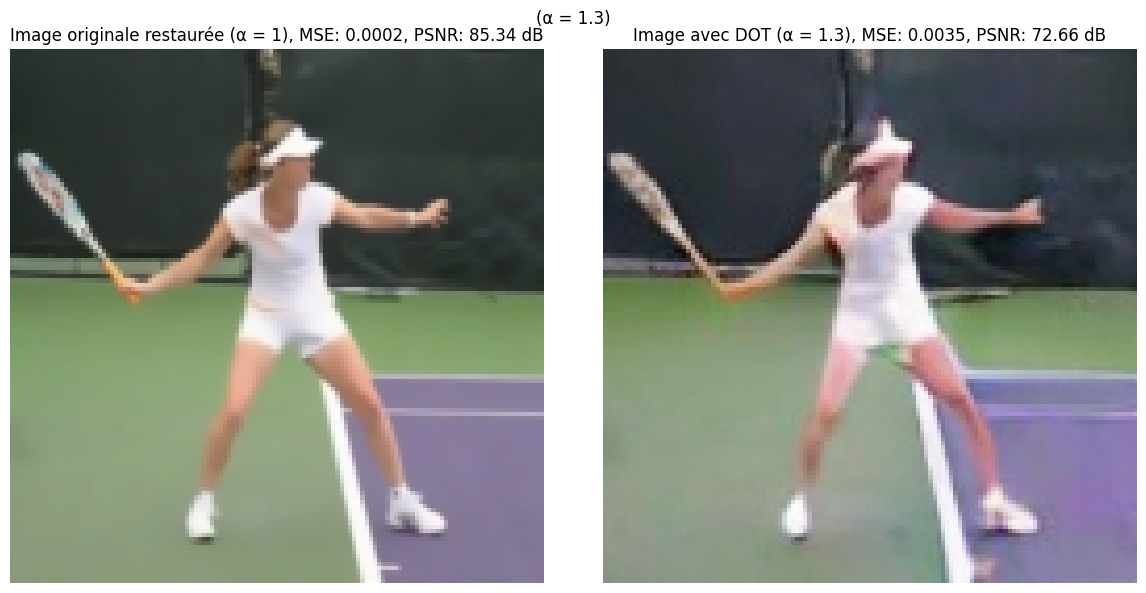

Test avec α = 1.5
latent_code shape: (4, 256)
mu_source shape before correction: (256, 1)
mu_source shape after correction: (1, 1)
Latent min: -15.281160892958574
Latent max: 19.8246192749721
Latent mean: 3.4341137254600853
Latent min: -15.281161
Latent max: 19.82462
Latent mean: 3.4341135


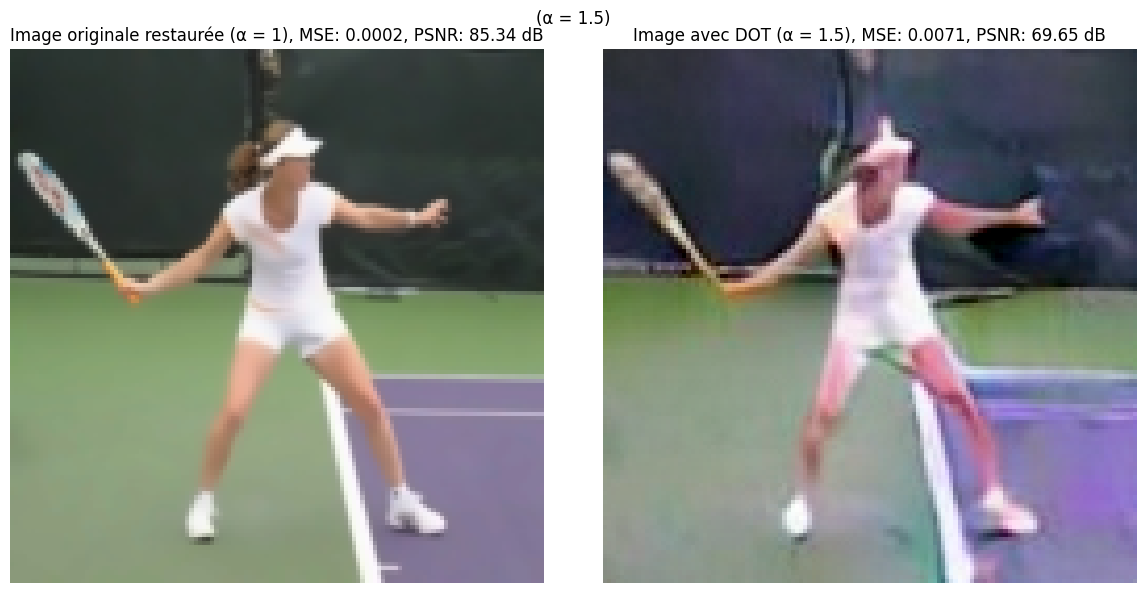


Génération de la courbe perception-distortion...
latent_code shape: (4, 256)
mu_source shape before correction: (256, 1)
mu_source shape after correction: (1, 1)
Latent min: -15.281274688312148
Latent max: 19.824220325840862
Latent mean: 3.4341629041751256
Latent min: -15.281275
Latent max: 19.82422
Latent mean: 3.4341626


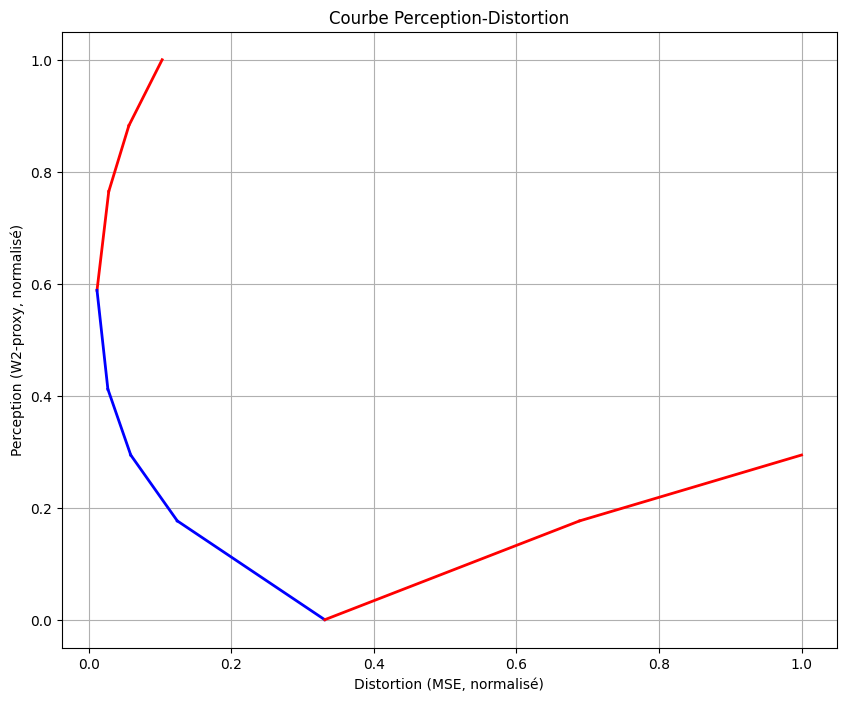

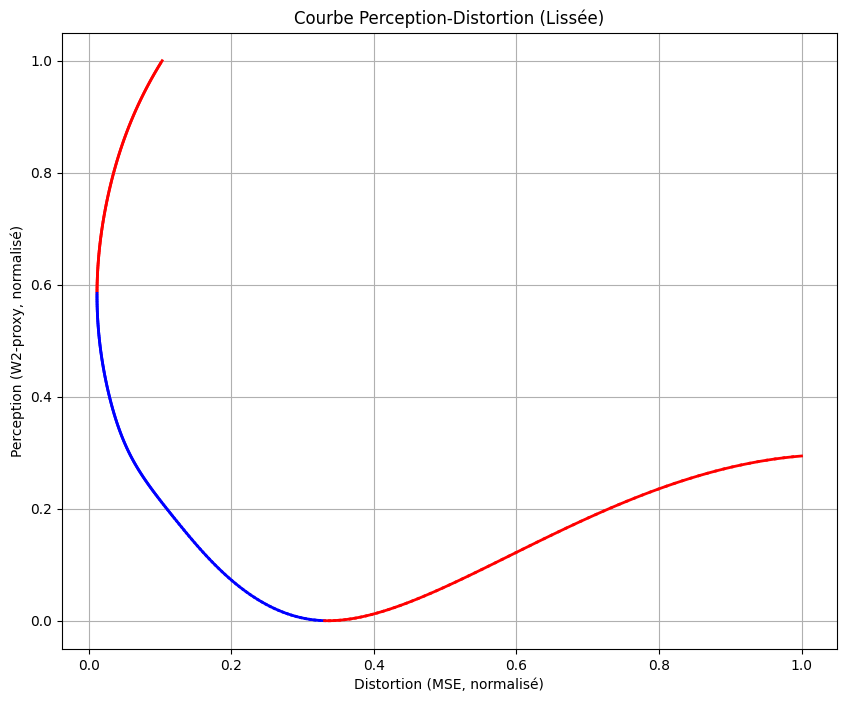

Processus terminé !


In [ ]:
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from diffusers import AutoencoderKL
import torch
import matplotlib.pyplot as plt

# Fonction principale
def main():
    # Paramètres
    latent_dim = 128
    batch_size = 5
    num_images = 10

    # Chemins des données
    clean_images_path = r"C:\Users\dahba\Downloads\COMPI\10_clean_images_training_1"
    restored_images_path = r"C:\Users\dahba\Downloads\COMPI\10_restored_images_training_1"
    test_image_path = r"C:\Users\dahba\Downloads\COMPI\restored_image_test\restored_noisy_1110822219_a079aeff30_c.jpg"
    clean_image_path = r"C:\Users\dahba\Downloads\COMPI\clean_image_test\1110822219_a079aeff30_c.jpg"

    # Transformation pour les images
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor()
    ])

    # Créer des datasets
    restored_dataset = ImageDataset(root_dir=restored_images_path, transform=transform)
    clean_dataset = ImageDataset(root_dir=clean_images_path, transform=transform)


    # Créer les DataLoaders
    restored_loader = DataLoader(restored_dataset, batch_size=batch_size, shuffle=True)
    clean_loader = DataLoader(clean_dataset, batch_size=batch_size, shuffle=True)

    # Charger le VAE pré-entraîné de Stability AI
    vae_model = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-ema").to("cpu")
    vae_model.eval()

    # Phase 1: Calcul de l'opérateur OT (hors ligne)
    print("\nCalcul des codes latents pour les images restaurées...")
    restored_latents = encode_images(vae_model, restored_loader, num_images)

    print("Calcul des codes latents pour les images propres...")
    clean_latents = encode_images(vae_model, clean_loader, num_images)

    print("Calcul de l'opérateur de transport optimal...")
    ot_operator = compute_ot_operator(restored_latents, clean_latents)

    # Phase 2: Inférence avec différentes valeurs d'alpha
    print("\nApplication de la transformation OT sur une image de test...")

    # Test avec différentes valeurs d'alpha
    alphas = [-0.7, -0.5, -0.3, 0.0, 0.3, 0.5, 0.7, 1.0, 1.3, 1.5]

    for alpha in alphas:
        print(f"Test avec α = {alpha}")
        test_image_restoration_with_alpha(vae_model, ot_operator, test_image_path,clean_image_path, alpha=alpha)

    # # Générer la courbe perception-distortion
    print("\nGénération de la courbe perception-distortion...")
    generate_perception_distortion_curve(vae_model, ot_operator, test_image_path,clean_image_path, alphas)

    print("Processus terminé !")

if __name__ == "__main__":
    main()


### 2.2- Unpaired images


Calcul des codes latents pour les images restaurées...
Calcul des codes latents pour les images propres...
Calcul de l'opérateur de transport optimal...
Cov source min: -22.956747629595757 max: 52.28561562012302
Cov target min: -26.46020035557669 max: 101.86189886217937
Transform matrix min: -3.509335102429246 max: 4.604236805993827 mean: 0.0029111089463477228

Application de la transformation OT sur une image de test...
Test avec α = -0.7
latent_code shape: (4, 256)
mu_source shape before correction: (256, 1)
mu_source shape after correction: (1, 1)
Latent min: -86.76486957211308
Latent max: 87.73356586892841
Latent mean: 2.6449221713705446
Latent min: -86.76487
Latent max: 87.73357
Latent mean: 2.6449223


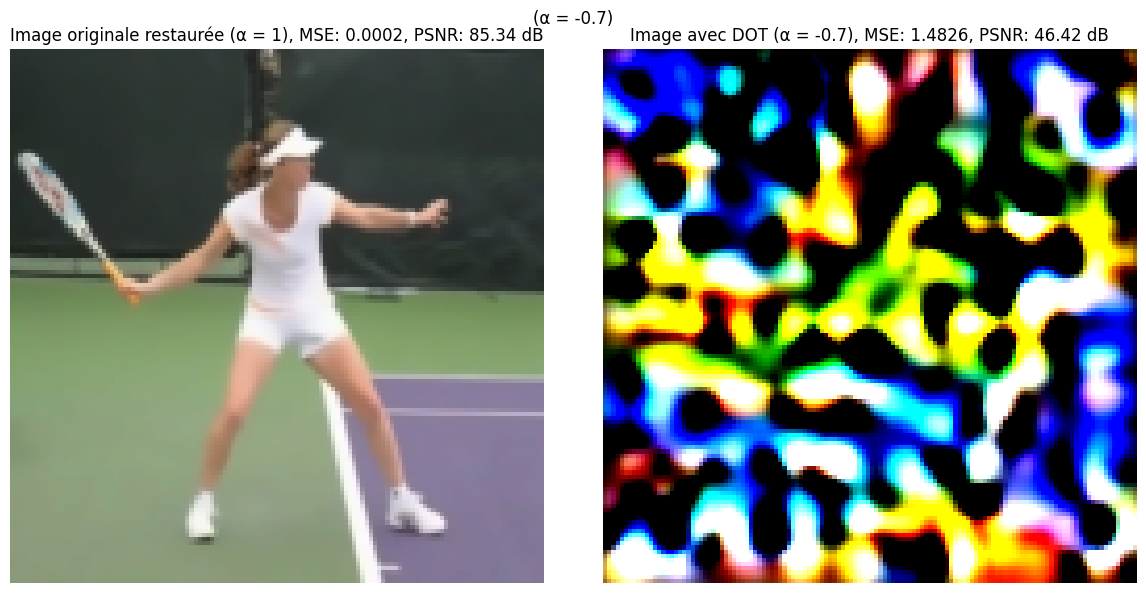

Test avec α = -0.5
latent_code shape: (4, 256)
mu_source shape before correction: (256, 1)
mu_source shape after correction: (1, 1)
Latent min: -86.77371576967681
Latent max: 87.73794119918354
Latent mean: 2.6448853534690815
Latent min: -86.77371
Latent max: 87.73794
Latent mean: 2.6448855


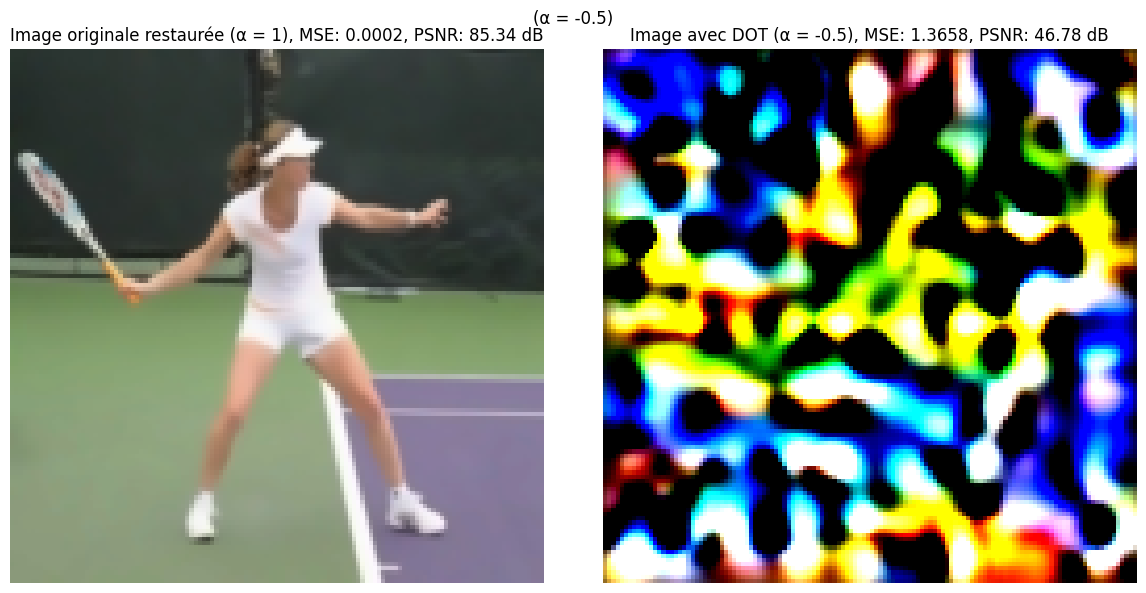

Test avec α = -0.3
latent_code shape: (4, 256)
mu_source shape before correction: (256, 1)
mu_source shape after correction: (1, 1)
Latent min: -86.78971897413257
Latent max: 87.75663965781082
Latent mean: 2.6449073828421312
Latent min: -86.78972
Latent max: 87.75664
Latent mean: 2.6449075


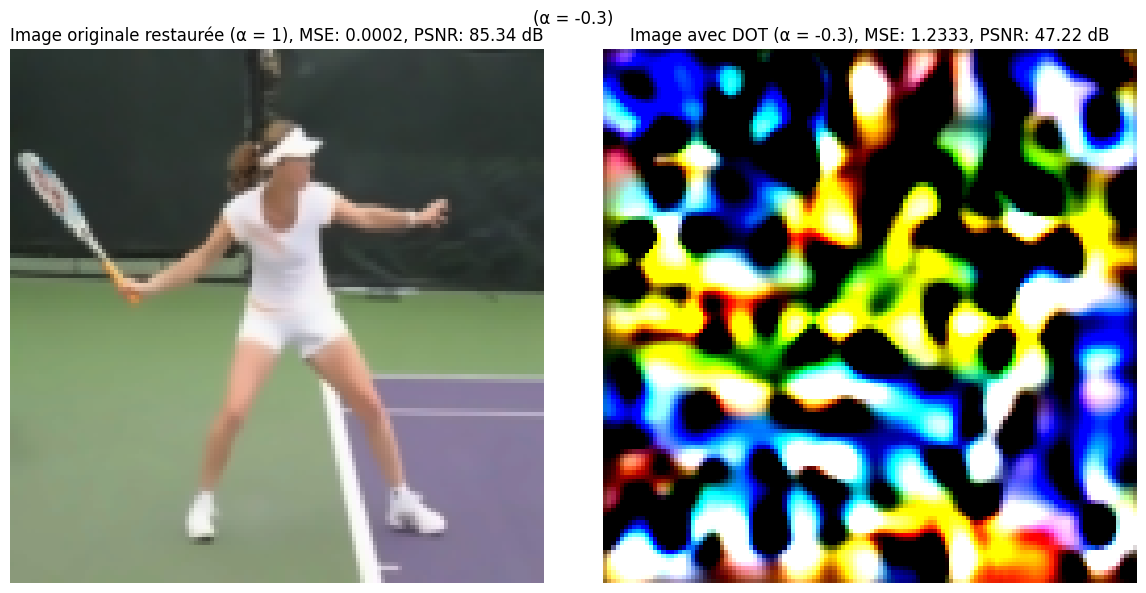

Test avec α = 0.0
latent_code shape: (4, 256)
mu_source shape before correction: (256, 1)
mu_source shape after correction: (1, 1)
Latent min: -86.7621829275734
Latent max: 87.72845190205425
Latent mean: 2.6448761745602045
Latent min: -86.762184
Latent max: 87.728455
Latent mean: 2.6448762


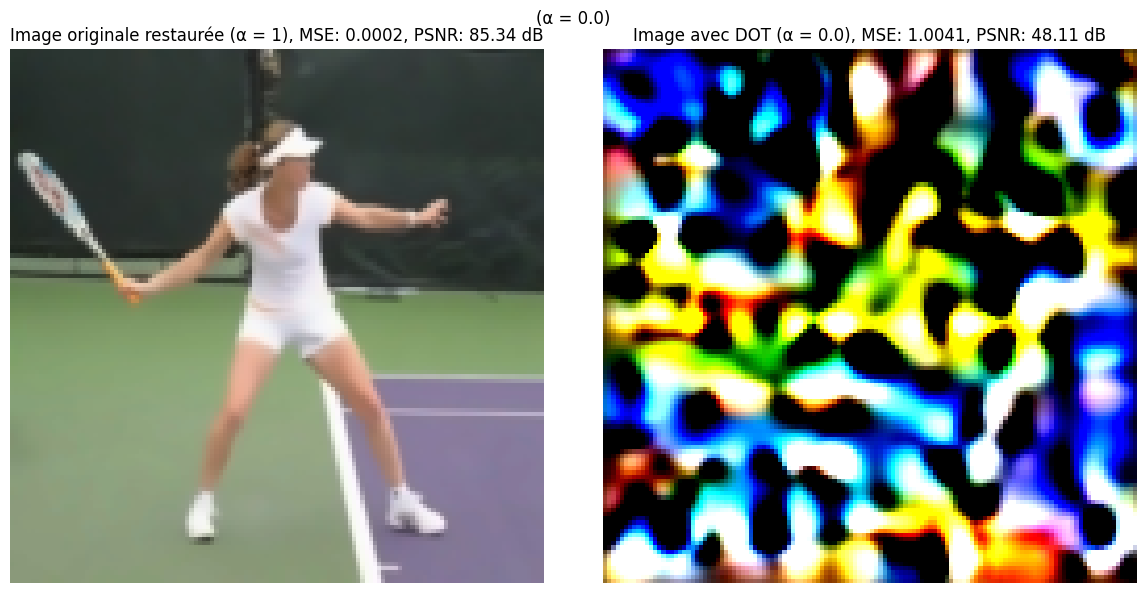

Test avec α = 0.3
latent_code shape: (4, 256)
mu_source shape before correction: (256, 1)
mu_source shape after correction: (1, 1)
Latent min: -86.75620477481698
Latent max: 87.72275039699338
Latent mean: 2.644866770986361
Latent min: -86.7562
Latent max: 87.72275
Latent mean: 2.6448667


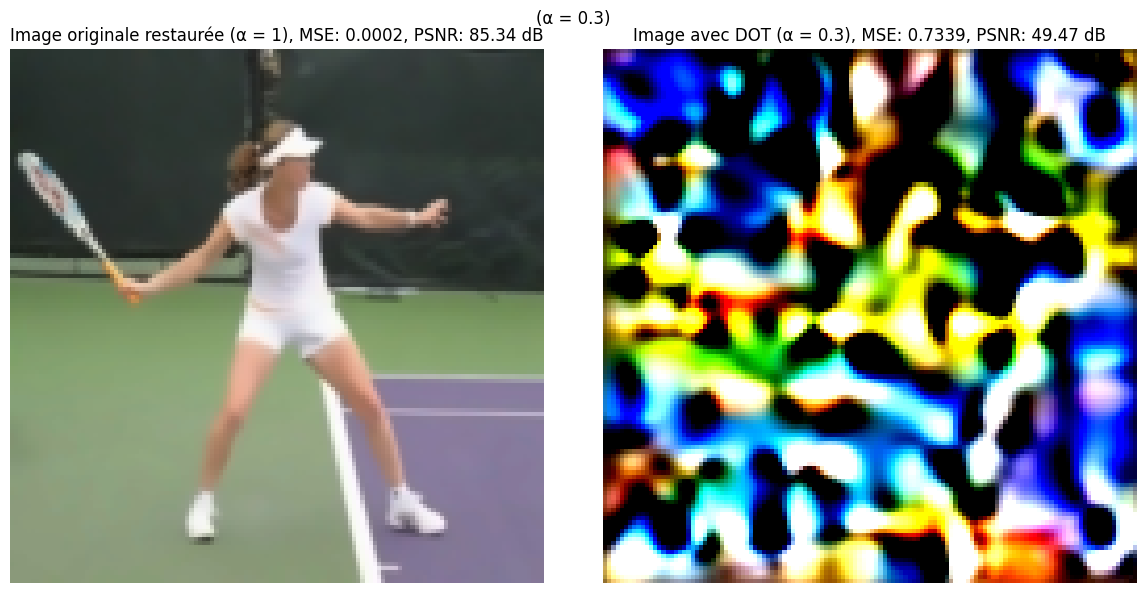

Test avec α = 0.5
latent_code shape: (4, 256)
mu_source shape before correction: (256, 1)
mu_source shape after correction: (1, 1)
Latent min: -86.77805051005024
Latent max: 87.74461188678686
Latent mean: 2.644941389170517
Latent min: -86.77805
Latent max: 87.74461
Latent mean: 2.6449413


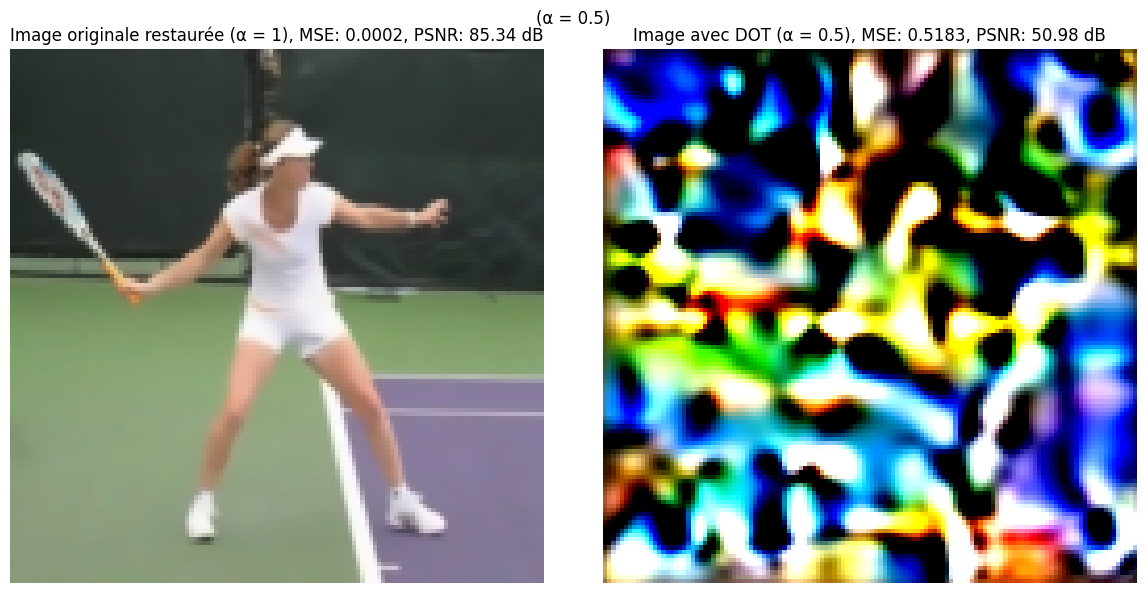

Test avec α = 0.7
latent_code shape: (4, 256)
mu_source shape before correction: (256, 1)
mu_source shape after correction: (1, 1)
Latent min: -86.76705500409928
Latent max: 87.73699109108475
Latent mean: 2.6448400150444993
Latent min: -86.76705
Latent max: 87.73699
Latent mean: 2.64484


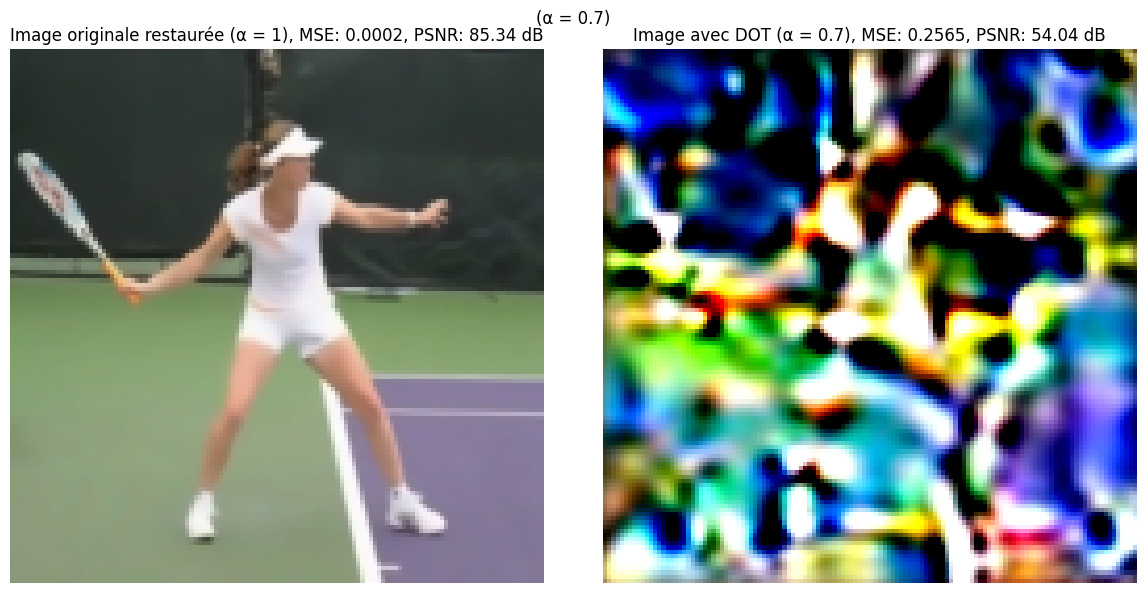

Test avec α = 1.0
latent_code shape: (4, 256)
mu_source shape before correction: (256, 1)
mu_source shape after correction: (1, 1)
Latent min: -86.78442744711393
Latent max: 87.75303806528947
Latent mean: 2.644799773845031
Latent min: -86.784424
Latent max: 87.75304
Latent mean: 2.6447997


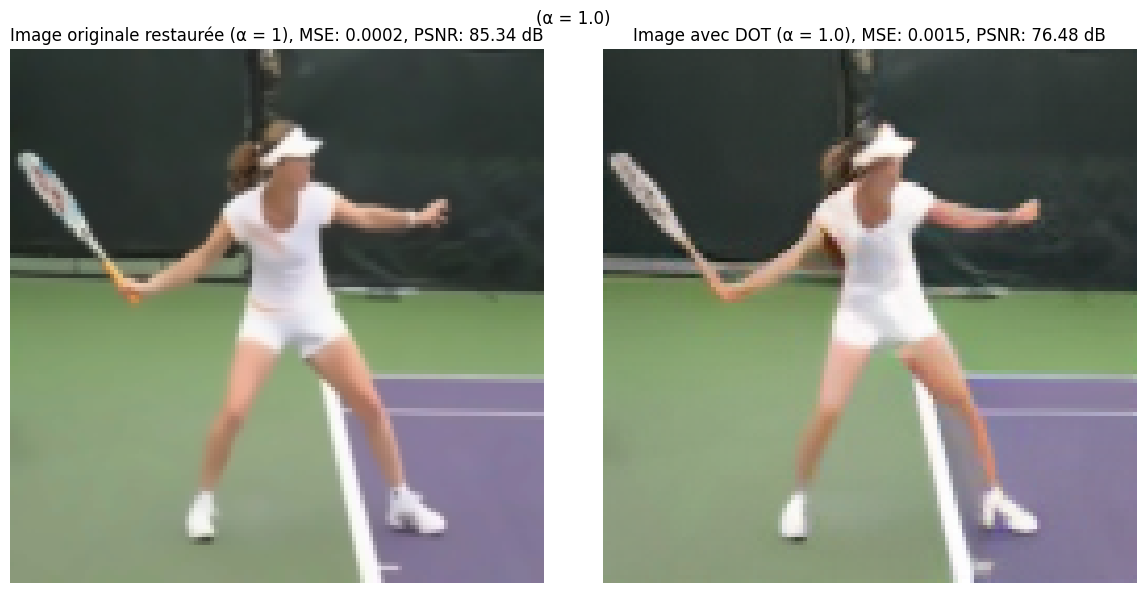

Test avec α = 1.3
latent_code shape: (4, 256)
mu_source shape before correction: (256, 1)
mu_source shape after correction: (1, 1)
Latent min: -86.76230975608537
Latent max: 87.72825990283413
Latent mean: 2.6448623732828147
Latent min: -86.76231
Latent max: 87.72826
Latent mean: 2.6448624


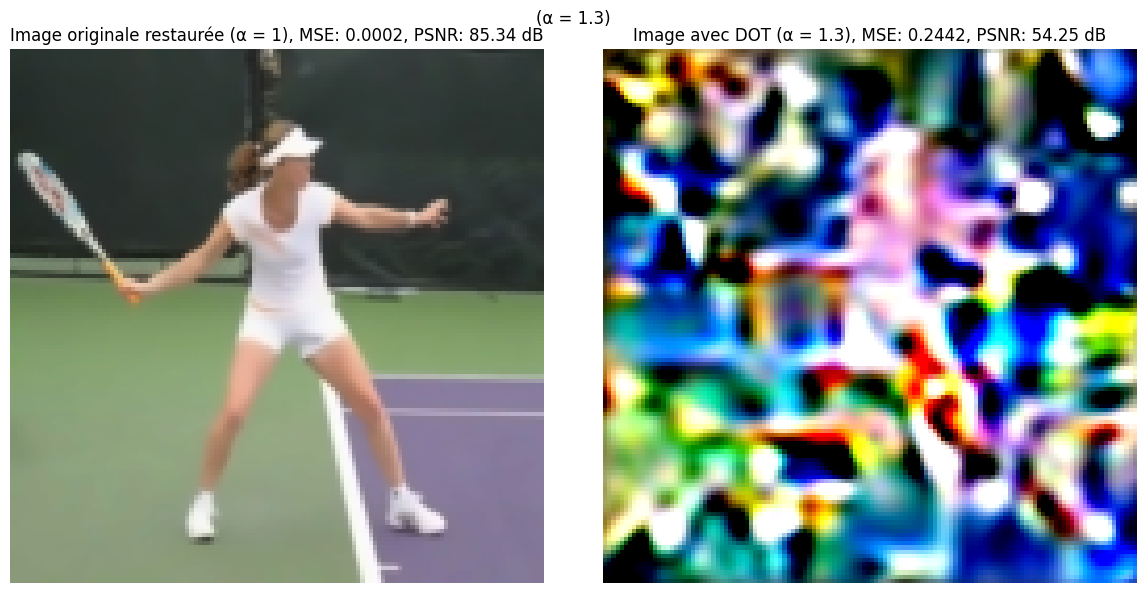

Test avec α = 1.5
latent_code shape: (4, 256)
mu_source shape before correction: (256, 1)
mu_source shape after correction: (1, 1)
Latent min: -86.77606487020556
Latent max: 87.74405729070487
Latent mean: 2.6449377226362425
Latent min: -86.77606
Latent max: 87.74406
Latent mean: 2.6449378


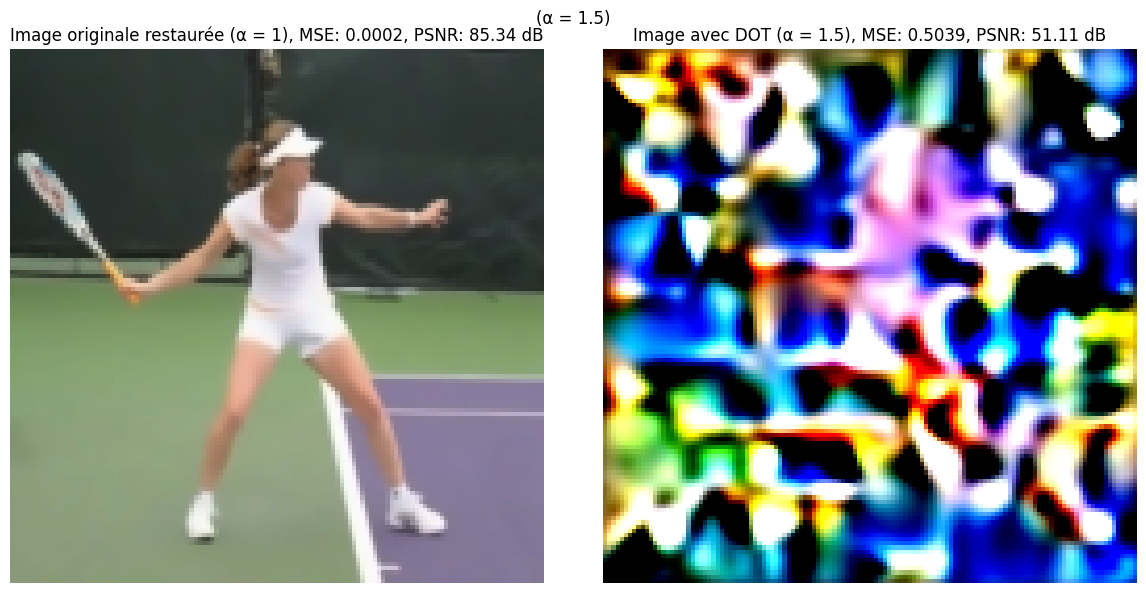


Génération de la courbe perception-distortion...
latent_code shape: (4, 256)
mu_source shape before correction: (256, 1)
mu_source shape after correction: (1, 1)
Latent min: -86.81989344520069
Latent max: 87.79413603432116
Latent mean: 2.6449282923018718
Latent min: -86.81989
Latent max: 87.794136
Latent mean: 2.6449285


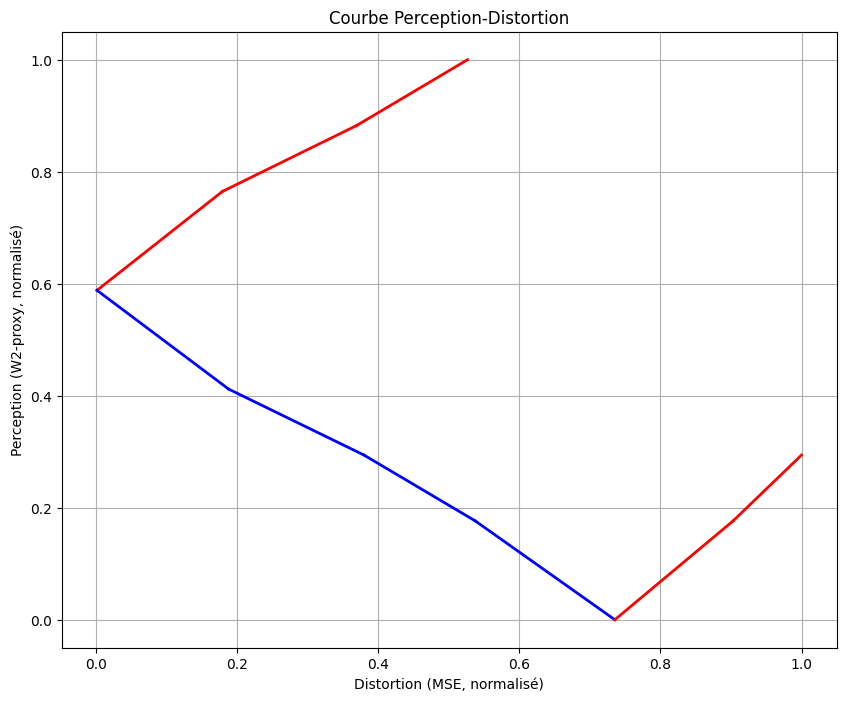

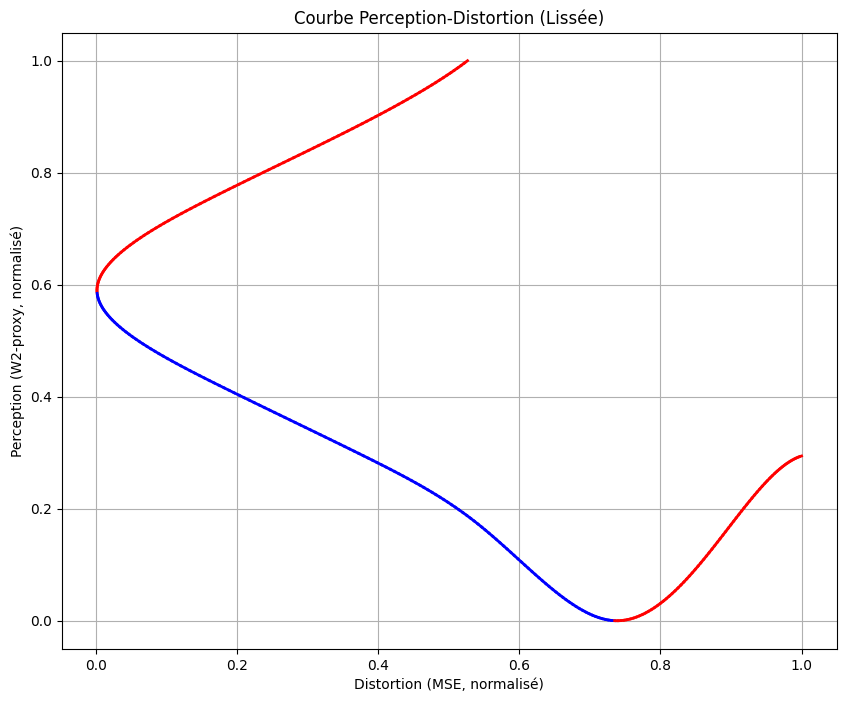

Processus terminé !


In [ ]:
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from diffusers import AutoencoderKL
import torch
import matplotlib.pyplot as plt

# Fonction principale
def main():
    # Paramètres
    latent_dim = 128  # Non utilisé ici car le VAE pré-entraîné a une dimension fixée
    batch_size = 5
    num_images = 10

    # Chemins des données
    restored_images_path = r"C:\Users\dahba\Downloads\COMPI\10_restored_images_training_2"
    clean_images_path = r"C:\Users\dahba\Downloads\COMPI\10_clean_images_training_1"
    test_image_path = r"C:\Users\dahba\Downloads\COMPI\restored_image_test\restored_noisy_1110822219_a079aeff30_c.jpg"
    clean_image_path = r"C:\Users\dahba\Downloads\COMPI\clean_image_test\1110822219_a079aeff30_c.jpg"

    # Transformation pour les images
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor()
    ])

    # Créer des datasets
    restored_dataset = ImageDataset(root_dir=restored_images_path, transform=transform)
    clean_dataset = ImageDataset(root_dir=clean_images_path, transform=transform)


    # Créer les DataLoaders
    restored_loader = DataLoader(restored_dataset, batch_size=batch_size, shuffle=True)
    clean_loader = DataLoader(clean_dataset, batch_size=batch_size, shuffle=True)

    # Charger le VAE pré-entraîné de Stability AI
    vae_model = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-ema").to("cpu")
    vae_model.eval()

    # Phase 1: Calcul de l'opérateur OT (hors ligne)
    print("\nCalcul des codes latents pour les images restaurées...")
    restored_latents = encode_images(vae_model, restored_loader, num_images)

    print("Calcul des codes latents pour les images propres...")
    clean_latents = encode_images(vae_model, clean_loader, num_images)

    print("Calcul de l'opérateur de transport optimal...")
    ot_operator = compute_ot_operator(restored_latents, clean_latents)

    # Phase 2: Inférence avec différentes valeurs d'alpha
    print("\nApplication de la transformation OT sur une image de test...")

    # Test avec différentes valeurs d'alpha
    alphas = [-0.7, -0.5, -0.3, 0.0, 0.3, 0.5, 0.7, 1.0, 1.3, 1.5]

    for alpha in alphas:
        print(f"Test avec α = {alpha}")
        test_image_restoration_with_alpha(vae_model, ot_operator, test_image_path,clean_image_path, alpha=alpha)

    # Générer la courbe perception-distortion
    print("\nGénération de la courbe perception-distortion...")
    generate_perception_distortion_curve(vae_model, ot_operator, test_image_path,clean_image_path, alphas)


    print("Processus terminé !")

if __name__ == "__main__":
    main()
